# Subjective Evaluation (ver. 2023.03.05)

In [1]:
import os, glob, mido, pickle, shutil, random
import muspy as mu
import os, glob, mido
import numpy as np
from mido import MidiFile
import pretty_midi as pr
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import seaborn as sns
from tqdm import tqdm
from math import log10,floor
from pathlib import Path
import pandas as pd

## Sample Selection & Processing

### Duration Filtering: 10-60s Outputs

In [12]:
directory='/data/data1/users/astais/Human-Evaluation/Midi Samples/'
# Count number of midis in directory
mid_num=len([f for f in Path(directory).rglob('*.mid*')])

count=0
# iterate over files in directory
for f in tqdm(Path(directory).rglob('*.mid*'),total=mid_num,
              desc="Processing "+str(mid_num)+" midi files"):
        try:
            mid=MidiFile(f)
            if(mid.length<10 or mid.length>60):
                os.remove(str(f))
                count+=1   
        except KeyboardInterrupt:
            print('Keyboard Interrupt.')
            break
        except:
            print("Error happened. File: "+str(f))

print('Done!')
print(count)


Processing 7800 midi files: 100%|███████████| 7800/7800 [02:13<00:00, 58.30it/s]

Done!
1694


### Random Sampling

In [4]:
directory='/data/data1/users/astais/Human-Evaluation/Midi Samples/'
save_dir='/data/data1/users/astais/Human-Evaluation/Midi-Samples-Sampled/'
# Count number of midis in directory

# all directories for sampling
# directories=[directory+'music-transformer/music-transformer_maestro-v3.0.0/',
#              directory+'music-transformer/music-transformer_GiantMIDI-Piano/',
#             directory+'music-transformer/music-transformer_ailabs1k7/',
#             directory+'music-transformer/music-transformer_Rock-Piano-MIDI-Dataset/',
#             directory+'music-transformer/music-transformer_adl-piano-midi/',
#              directory+'music-transformer/music-transformer_Los-Angeles-MIDI-Dataset-segment/',
#              directory+'perceiver-ar/perceiver-ar_maestro-v3.0.0/',
#              directory+'perceiver-ar/perceiver-ar_GiantMIDI-Piano/',
# directories=[
#             directory+'perceiver-ar/perceiver-ar_ailabs1k7/',
#             directory+'perceiver-ar/perceiver-ar_Rock-Piano-MIDI-Dataset/',
#             directory+'perceiver-ar/perceiver-ar_adl-piano-midi/',
#              directory+'perceiver-ar/perceiver-ar_Los-Angeles-MIDI-Dataset-segment/'
#             ]

directories=[directory+'/training-datasets/']
num=96
for Dir in tqdm(directories): 
    print(Dir)
    # count number of midis in directory
    mid_num=len(tqdm([f for f in Path(Dir).rglob('*.mid*')]))
    file_list = list(Path(Dir).glob(f"**/*.mid*"))
    if not len(file_list):
        print("No files found.")

    # iterate over files in directory and randomly copy 
    for i in tqdm(range(num),desc="Choosing "+str(num)+" samples for this directory."):
        while True: 
            try:
                # pick a random file from the file list
                rand = random.randint(0, len(file_list) - 1)
                file=str(file_list[rand])
                
                # test that the file can be processed
                pr.PrettyMIDI(file)
                mu.from_mido(MidiFile(file), duplicate_note_mode='fifo')
                # copy file to primers folder
                shutil.copy(file,save_dir)
            except:            
                # Error happened, continue
                print("Error happened. File: "+file)
                continue
            else:
                break

    print('Done!')


  0%|                                                     | 0/1 [00:00<?, ?it/s]

/data/data1/users/astais/Human-Evaluation/Midi Samples//training-datasets/



  0%|                                                   | 0/450 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]

Done!


## Listening Test Page

### Create basic and pro users rating dictionaries

In [ ]:
basic={}
pro={}
directory='/home/astais/survey/static/samples/'
mp3_num=len([f for f in Path(directory).rglob('*.mp3*')])

# iterate over files in directory
for f in tqdm(Path(directory).rglob('*.mp3*'),total=mp3_num,
              desc="Processing "+str(mp3_num)+" mp3 files"):
        try:
            basic[f.name]=[[],[],[],[],[],[],[],[]]
            pro[f.name]=[[],[],[],[],[],[],[],[]]
        except KeyboardInterrupt:
            print('Keyboard Interrupt.')
            break
        except:
            print("Error happened. File: "+str(f))

print('Done!')

with open('/home/astais/survey/static/ratings/basic.pkl', 'wb') as f:
    pickle.dump(basic, f, pickle.HIGHEST_PROTOCOL)
    
with open('/home/astais/survey/static/ratings/pro.pkl', 'wb') as f:
    pickle.dump(pro, f, pickle.HIGHEST_PROTOCOL)
    
with open('/home/astais/survey/static/ratings/basic.pkl', 'rb') as f:
    x=pickle.load(f)
    
with open('/home/astais/survey/static/ratings/pro.pkl', 'rb') as f:
    y=pickle.load(f)
    
print(x)
print(y)


### Read Rating Dictionaries

In [ ]:
files = os.listdir('/home/astais/survey/static/samples/')
print(files)

with open('/home/astais/survey/static/samples-list.pkl', 'wb') as f:
    pickle.dump(files, f)
    
with open('/home/astais/survey/static/samples-list.pkl', 'rb') as f:
    z=pickle.load(f)
    
print(z)
print(files==z)


In [12]:
with open('/home/astais/survey/static/ratings/ratings_pro.pkl', 'rb') as f:
    y=pickle.load(f)
with open('/home/astais/survey/static/ratings/ratings_basic.pkl', 'rb') as f:
    z=pickle.load(f)
print(len(y))
print(len(z))

672
672


## Subjective Metrics Dataframe

In [30]:
import pandas as pd
import pickle

d_n={
    'ratings_basic.pkl':"Basic",
    'ratings_pro.pkl':"Pro",
    "music-transformer": "Music Transformer Outputs",
    "perceiver-ar": "Perceiver-AR Outputs",
    "training-datasets": "Training Dataset",
    "adl-piano-midi": "adl-piano-midi" , 
    "ailabs1k7": "ailabs1k7",
    "ailabs1k17": "ailabs1k7",
    "GiantMIDI-Piano": "GiantMIDI-Piano",
    "Los-Angeles-MIDI-Dataset-segment": "Los-Angeles-MIDI-\nDataset-segment", 
    "maestro-v3.0.0": "maestro-v3.0.0",
    "Rock-Piano-MIDI-Dataset": "Rock-Piano-\nMIDI-Dataset"
}


# create lists to store the values
sample_names = []
dataset_types = []
datasets = []
numbers= []
primer_datasets=[]
users=[]
similar_music = []
emotions = []
melody = []
harmony = []
rhythm = []
genre = []
creator = []
rating = []

for file in ['ratings_basic.pkl','ratings_pro.pkl']:
    
    # load the dictionary
    with open('/home/astais/'+file, 'rb') as f:
        ratings_dict = pickle.load(f)
    
    # iterate over the dictionary and extract the values
    for sample, ratings in ratings_dict.items():
        sample_name = sample.split("_no-primer")[0]
        dataset_type = d_n[sample.split("_")[0]]
        dataset = d_n[sample.split("_")[1]]
        number = float(sample.split("_")[3])

        if(dataset_type=="Training Dataset"):
            primer_dataset=dataset
        else:
            primer_dataset = d_n[sample.split("_")[2]]

        # If the sample has no ratings, skip
        if (ratings==[[], [], [], [], [], [], [], []]):
            continue

        for i in range(len(ratings[0])):
            sample_names.append(sample_name)
            dataset_types.append(dataset_type)
            datasets.append(dataset)
            numbers.append(number)
            primer_datasets.append(primer_dataset)
            users.append(d_n[file])
            similar_music.append(ratings[0][i])
            emotions.append(ratings[1][i])
            melody.append(ratings[2][i])
            harmony.append(ratings[3][i])
            rhythm.append(ratings[4][i])
            genre.append(ratings[5][i])
            creator.append(ratings[6][i])
            rating.append(ratings[7][i])


# create the DataFrame
df = pd.DataFrame({
    "Sample Name": sample_names,
    "Dataset Type": dataset_types,
    "Dataset": datasets,
    "Number": numbers,
    "Primer Dataset": primer_datasets,
    "Musical Knowledge": users,
    "Familiarity": similar_music,
    "Emotion": emotions,
    "Melodiousness": melody,
    "Harmonicity": harmony,
    "Rhythmicity": rhythm,
    "Genre": genre,
    "Naturalness": creator,
    "Rating": rating
})

df['Naturalness'] = df['Naturalness']-1

cols = ["Familiarity","Melodiousness","Harmonicity","Rhythmicity","Genre"]
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

cols2=["Emotion","Naturalness","Rating"]
df[cols2] = df[cols2].astype(float)

pd.set_option('display.max_colwidth', None)
print(df)

# Save dataframe to pickle file
df.to_pickle('/home/astais/ratings_dataframe.pkl')

                                                                           Sample Name  \
0       music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
1                               music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
2                               music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
3                               music-transformer_adl-piano-midi_ailabs1k7_81_20230106   
4                               music-transformer_adl-piano-midi_ailabs1k7_81_20230106   
...                                                                                ...   
1375  perceiver-ar_Los-Angeles-MIDI-Dataset-segment_GiantMIDI-Piano_40_20221207_161342   
1376                     perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1377                     perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1378                             music-transformer_ailabs1k7_maestro-v3.0.0_4_20230106   
1379      

### Subjective Metrics Statistics

In [33]:
datasets=['adl-piano-midi','ailabs1k7','GiantMIDI-Piano',
          'Los-Angeles-MIDI-\nDataset-segment','maestro-v3.0.0','Rock-Piano-\nMIDI-Dataset']
dataset_types=["Training Dataset","Music Transformer Outputs","Perceiver-AR Outputs"]
metrics=[ "Familiarity","Emotion","Melodiousness","Harmonicity","Rhythmicity","Genre","Naturalness","Rating"]
basic_metrics=["Familiarity","Emotion","Naturalness","Rating"]
pro_metrics=["Emotion", "Melodiousness", "Harmonicity", "Rhythmicity", "Genre", "Naturalness", "Rating"]


In [5]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
d_n2={
    "adl-piano-midi": "adl-piano-midi" , 
    "ailabs1k7": "ailabs1k7",
    "ailabs1k17": "ailabs1k7",
    "GiantMIDI-Piano": "GiantMIDI-Piano",
    "Los-Angeles-MIDI-\nDataset-segment": "Los-Angeles-MIDI-Dataset-segment", 
    "maestro-v3.0.0": "maestro-v3.0.0",
     "Rock-Piano-\nMIDI-Dataset": "Rock-Piano-MIDI-Dataset"
}

excel_df_basic=pd.DataFrame()
excel_df_pro=pd.DataFrame()

for dataset in datasets:
    df_sub = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Training Dataset") & (df["Musical Knowledge"] == "Basic")].describe()
    df_sub2 = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Music Transformer Outputs") & (df["Musical Knowledge"] == "Basic")].describe()
    df_sub3 = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Musical Knowledge"] == "Basic")].describe()
    df_sub4 = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Training Dataset") & (df["Musical Knowledge"] == "Pro")].describe()
    df_sub5 = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Music Transformer Outputs") & (df["Musical Knowledge"] == "Pro")].describe()
    df_sub6 = df[(df["Dataset"] == dataset) & (df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Musical Knowledge"] == "Pro")].describe()
    
    df_sub.insert(loc=0, column='Dataset Type', value=["Training Dataset"] *  len(df_sub))
    df_sub.insert(loc=1, column='Dataset', value=[d_n2[dataset]] * len(df_sub))
    df_sub2.insert(loc=0, column='Dataset Type', value=["Music Transformer Outputs"] *  len(df_sub2))
    df_sub2.insert(loc=1, column='Dataset', value=[d_n2[dataset]] * len(df_sub2))
    df_sub3.insert(loc=0, column='Dataset Type', value=["Perceiver-AR Outputs"] *  len(df_sub3))
    df_sub3.insert(loc=1, column='Dataset', value=[d_n2[dataset]]* len(df_sub3))
    df_sub4.insert(loc=0, column='Dataset Type', value=["Training Dataset"] *  len(df_sub4))
    df_sub4.insert(loc=1, column='Dataset', value=[d_n2[dataset]] * len(df_sub4))
    df_sub5.insert(loc=0, column='Dataset Type', value=["Music Transformer Outputs"] *  len(df_sub5))    
    df_sub5.insert(loc=1, column='Dataset', value=[d_n2[dataset]] * len(df_sub5))
    df_sub6.insert(loc=0, column='Dataset Type', value=["Perceiver-AR Outputs"] *  len(df_sub6))
    df_sub6.insert(loc=1, column='Dataset', value=[d_n2[dataset]] * len(df_sub6))
    
    df_sub.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
    df_sub2.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
    df_sub3.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
    df_sub4.drop(["Familiarity"], inplace=True, axis=1)
    df_sub5.drop(["Familiarity"], inplace=True, axis=1)
    df_sub6.drop(["Familiarity"], inplace=True, axis=1)

    df_sub.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    df_sub2.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    df_sub3.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    df_sub4.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    df_sub5.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    df_sub6.drop(["min","25%", "50%","75%","max"], inplace=True, axis=0)
    
    excel_df_basic=pd.concat([excel_df_basic,df_sub,df_sub2,df_sub3])
    excel_df_pro=pd.concat([excel_df_pro,df_sub4,df_sub5,df_sub6])

print(excel_df_basic)
print(excel_df_pro)
    
excel_df_basic.to_excel("subjective_metrics_basic.xlsx")
excel_df_pro.to_excel("subjective_metrics_pro.xlsx")

                    Dataset Type                           Dataset  \
count           Training Dataset                    adl-piano-midi   
mean            Training Dataset                    adl-piano-midi   
std             Training Dataset                    adl-piano-midi   
count  Music Transformer Outputs                    adl-piano-midi   
mean   Music Transformer Outputs                    adl-piano-midi   
std    Music Transformer Outputs                    adl-piano-midi   
count       Perceiver-AR Outputs                    adl-piano-midi   
mean        Perceiver-AR Outputs                    adl-piano-midi   
std         Perceiver-AR Outputs                    adl-piano-midi   
count           Training Dataset                         ailabs1k7   
mean            Training Dataset                         ailabs1k7   
std             Training Dataset                         ailabs1k7   
count  Music Transformer Outputs                         ailabs1k7   
mean   Music Transfo

### Subjective Metrics Plots: Single Subjective Metric

In [34]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
df_pro = df[df["Musical Knowledge"] == "Pro"]
df_basic = df[df["Musical Knowledge"] == "Basic"]
print(df_pro)
print(df_basic)

for metric in tqdm(pro_metrics):    
    
    # Barplot
    sns.set(rc={'figure.figsize':(12,8)})
    g = sns.barplot(data=df_pro, x="Dataset", y=metric, errorbar='sd', capsize=.1, hue='Dataset Type',hue_order=dataset_types)
    if(metric=="Naturalness"):
        g.set(ylim=(0,1))
    else:
        g.set(ylim=(1,5))
    g.set(title ="Pro Subject: "+metric+" Barplot")
    g.legend(loc='upper right')
    g.xaxis.set_minor_locator(AutoMinorLocator(5))
    g.yaxis.set_minor_locator(AutoMinorLocator(5))
    g.grid(which='minor', alpha=0.3)
    g.grid(which='major', alpha=0.6)
    g.figure.savefig(metric+"_barplot_pro.png",dpi=300,bbox_inches='tight')
    g.figure.show()
    g.figure.clf()
    
for metric in tqdm(basic_metrics):    
    
    # Barplot
    sns.set(rc={'figure.figsize':(12,8)})
    g = sns.barplot(data=df_basic, x="Dataset", y=metric, errorbar='sd', capsize=.1, hue='Dataset Type',hue_order=dataset_types)
    if(metric=="Naturalness"):
        g.set(ylim=(0,1))
    else:
        g.set(ylim=(1,5))
    g.set(title ="Basic Subject: "+metric+" Barplot")
    g.legend(loc='upper right')
    g.xaxis.set_minor_locator(AutoMinorLocator(5))
    g.yaxis.set_minor_locator(AutoMinorLocator(5))
    g.grid(which='minor', alpha=0.3)
    g.grid(which='major', alpha=0.6)
    g.figure.savefig(metric+"_barplot_basic.png",dpi=300,bbox_inches='tight')
    g.figure.show()
    g.figure.clf()

                                                                                   Sample Name  \
674                          perceiver-ar_Rock-Piano-MIDI-Dataset_ailabs1k7_38_20221204_223639   
675   perceiver-ar_Rock-Piano-MIDI-Dataset_Los-Angeles-MIDI-Dataset-segment_15_20221205_070623   
676             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
677             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
678                                     music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
...                                                                                        ...   
1375          perceiver-ar_Los-Angeles-MIDI-Dataset-segment_GiantMIDI-Piano_40_20221207_161342   
1376                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1377                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1378                

100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


<Figure size 1200x800 with 0 Axes>

### Subjective Metrics Plots: All Subjective Metrics vs Dataset Types

In [16]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
# Apply transformation to 'Naturalness' column to scale to 1-5
df['Naturalness'] = 4*df['Naturalness']+1
df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
df_basic = df[df["Musical Knowledge"] == "Basic"].copy()
# print(df_pro)
# print(df_basic)

# Create long (tidy) dataframe form
df_basic.drop(["Sample Name","Dataset","Primer Dataset","Musical Knowledge",
               "Melodiousness","Harmonicity","Rhythmicity","Genre"], inplace=True, axis=1)
dfm_basic = df_basic.melt('Dataset Type', var_name='Subjective Metrics', value_name='Values')

df_pro.drop(["Sample Name","Dataset","Primer Dataset","Musical Knowledge","Familiarity"], inplace=True, axis=1)
dfm_pro = df_pro.melt('Dataset Type', var_name='Subjective Metrics', value_name='Values')

# Basic Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Subjective Metrics", y='Values', hue="Dataset Type", hue_order=dataset_types, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Subjective Metrics across Dataset Types Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_dataset-type_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Subjective Metrics", y='Values', hue="Dataset Type", hue_order=dataset_types, 
                errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Subjective Metrics across Dataset Types Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_dataset-type_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Basic Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Dataset Type", y='Values', hue="Subjective Metrics", order=dataset_types, 
                hue_order=basic_metrics,errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Dataset Types across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("dataset-type_all-metrics_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Dataset Type", y='Values', hue="Subjective Metrics", 
                order=dataset_types, hue_order=pro_metrics, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Dataset Types across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("dataset-type_all-metrics_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()
print("Done!")
    

Done!


<Figure size 1200x800 with 0 Axes>

### Subjective Metrics Plots: All Subjective Metrics vs Datasets

In [32]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
df= df[~(df["Dataset Type"].astype(bool) & (df["Dataset Type"] == "Training Dataset"))]
# Apply transformation to 'Naturalness' column to scale to 1-5
df['Naturalness'] = 4*df['Naturalness']+1
df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
df_basic = df[df["Musical Knowledge"] == "Basic"].copy()
print(df_pro)
print(df_basic)

# Create long (tidy) dataframe form
df_basic.drop(["Sample Name","Dataset Type","Primer Dataset","Musical Knowledge",
               "Melodiousness","Harmonicity","Rhythmicity","Genre"], inplace=True, axis=1)
dfm_basic = df_basic.melt('Dataset', var_name='Subjective Metrics', value_name='Values')

df_pro.drop(["Sample Name","Dataset Type","Primer Dataset","Musical Knowledge","Familiarity"], inplace=True, axis=1)
dfm_pro = df_pro.melt('Dataset', var_name='Subjective Metrics', value_name='Values')

# Basic Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Subjective Metrics", y='Values', hue="Dataset", 
                order=basic_metrics, hue_order=datasets, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Subjective Metrics across Datasets Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_dataset_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Subjective Metrics", y='Values', hue="Dataset", 
                order=pro_metrics, hue_order=datasets, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Subjective Metrics across Datasets Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_dataset_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Basic Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Dataset", y='Values', hue="Subjective Metrics", 
                order=datasets, hue_order=basic_metrics, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Datasets across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("dataset_all-metrics_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Dataset", y='Values', hue="Subjective Metrics", 
                order=datasets, hue_order=pro_metrics, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Datasets across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("dataset_all-metrics_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()
print("Done!")
    

                                                                                   Sample Name  \
674                          perceiver-ar_Rock-Piano-MIDI-Dataset_ailabs1k7_38_20221204_223639   
675   perceiver-ar_Rock-Piano-MIDI-Dataset_Los-Angeles-MIDI-Dataset-segment_15_20221205_070623   
676             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
677             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
678                                     music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
...                                                                                        ...   
1375          perceiver-ar_Los-Angeles-MIDI-Dataset-segment_GiantMIDI-Piano_40_20221207_161342   
1376                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1377                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1378                

NameError: name 'basic_metrics' is not defined

### Subjective Metrics Plots: All Subjective Metrics vs Primer Datasets

In [15]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
df= df[~(df["Dataset Type"].astype(bool) & (df["Dataset Type"] == "Training Dataset"))]
# Apply transformation to 'Naturalness' column to scale to 1-5
df['Naturalness'] = 4*df['Naturalness']+1
df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
df_basic = df[df["Musical Knowledge"] == "Basic"].copy()
# print(df_pro)
# print(df_basic)

# Create long (tidy) dataframe form
df_basic.drop(["Sample Name","Dataset Type","Dataset","Musical Knowledge",
               "Melodiousness","Harmonicity","Rhythmicity","Genre"], inplace=True, axis=1)
dfm_basic = df_basic.melt('Primer Dataset', var_name='Subjective Metrics', value_name='Values')

df_pro.drop(["Sample Name","Dataset Type","Dataset","Musical Knowledge","Familiarity"], inplace=True, axis=1)
dfm_pro = df_pro.melt('Primer Dataset', var_name='Subjective Metrics', value_name='Values')

# Basic Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Subjective Metrics", y='Values', hue="Primer Dataset", 
                order=basic_metrics, hue_order=datasets, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Subjective Metrics across Primer Datasets Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_primer-dataset_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Metrics across Dataset Types Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Subjective Metrics", y='Values', hue="Primer Dataset", 
                order=pro_metrics, hue_order=datasets, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Subjective Metrics across Primer Datasets Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("all-metrics_primer-dataset_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Basic Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Primer Dataset", y='Values', hue="Subjective Metrics", 
                order=datasets, hue_order=basic_metrics, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Primer Datasets across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("primer-dataset_all-metrics_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Primer Dataset", y='Values', hue="Subjective Metrics", 
                order=datasets, hue_order=pro_metrics, errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Primer Datasets across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("primer-dataset_all-metrics_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

print("Done!")

                                                                                   Sample Name  \
674                          perceiver-ar_Rock-Piano-MIDI-Dataset_ailabs1k7_38_20221204_223639   
675   perceiver-ar_Rock-Piano-MIDI-Dataset_Los-Angeles-MIDI-Dataset-segment_15_20221205_070623   
676             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
677             music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
678                                     music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
...                                                                                        ...   
1375          perceiver-ar_Los-Angeles-MIDI-Dataset-segment_GiantMIDI-Piano_40_20221207_161342   
1376                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1377                             perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1378                

<Figure size 1200x800 with 0 Axes>

In [22]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
# Apply transformation to 'Naturalness' column to scale to 1-5
df['Naturalness'] = 4*df['Naturalness']+1
df_pro = df[(df["Musical Knowledge"] == "Pro") & (df["Dataset Type"] == "Perceiver-AR Outputs")].copy()
df_basic = df[(df["Musical Knowledge"] == "Basic") & (df["Dataset Type"] == "Perceiver-AR Outputs")].copy()
# print(df_pro)
# print(df_basic)

# Create long (tidy) dataframe form
df_basic.drop(["Sample Name","Dataset Type","Primer Dataset","Musical Knowledge",
               "Melodiousness","Harmonicity","Rhythmicity","Genre"], inplace=True, axis=1)
dfm_basic = df_basic.melt('Dataset', var_name='Subjective Metrics', value_name='Values')

df_pro.drop(["Sample Name","Dataset Type","Primer Dataset","Musical Knowledge","Familiarity"], inplace=True, axis=1)
dfm_pro = df_pro.melt('Dataset', var_name='Subjective Metrics', value_name='Values')

# Basic Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_basic, x="Dataset", y='Values', order=datasets, 
                errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Basic Subject: Dataset across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("perceiver-ar_all-metrics-added_barplot_basic.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()

# Pro Subject: All Dataset Types across Metrics Barplot
sns.set(rc={'figure.figsize':(12,8)})
g = sns.barplot(data=dfm_pro, x="Dataset", y='Values', order=datasets, 
                errorbar='sd', capsize=.1)
g.set(ylim=(1,5))
g.set(title ="Pro Subject: Dataset Types across Subjective Metrics Barplot")
g.legend(loc='upper right')
g.xaxis.set_minor_locator(AutoMinorLocator(5))
g.yaxis.set_minor_locator(AutoMinorLocator(5))
g.grid(which='minor', alpha=0.3)
g.grid(which='major', alpha=0.6)
g.figure.savefig("perceiver-ar_all-metrics-added_barplot_pro.png",dpi=300,bbox_inches='tight')
g.figure.show()
g.figure.clf()
print("Done!")
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Done!


<Figure size 1200x800 with 0 Axes>

## Subjective & Objective Metrics Correlation

/tmp/ipykernel_2391174/2851083283.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub_cor=df_sub_cor.corr(method='kendall')
/tmp/ipykernel_2391174/2851083283.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_obj_cor=df_obj_cor.corr(method='kendall')
/tmp/ipykernel_2391174/2851083283.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged_cor = df_merged.corr(method='kendall')
/tmp/ipykernel_2391174/2851083283.py:38: FutureWarning: save is not part of the pub

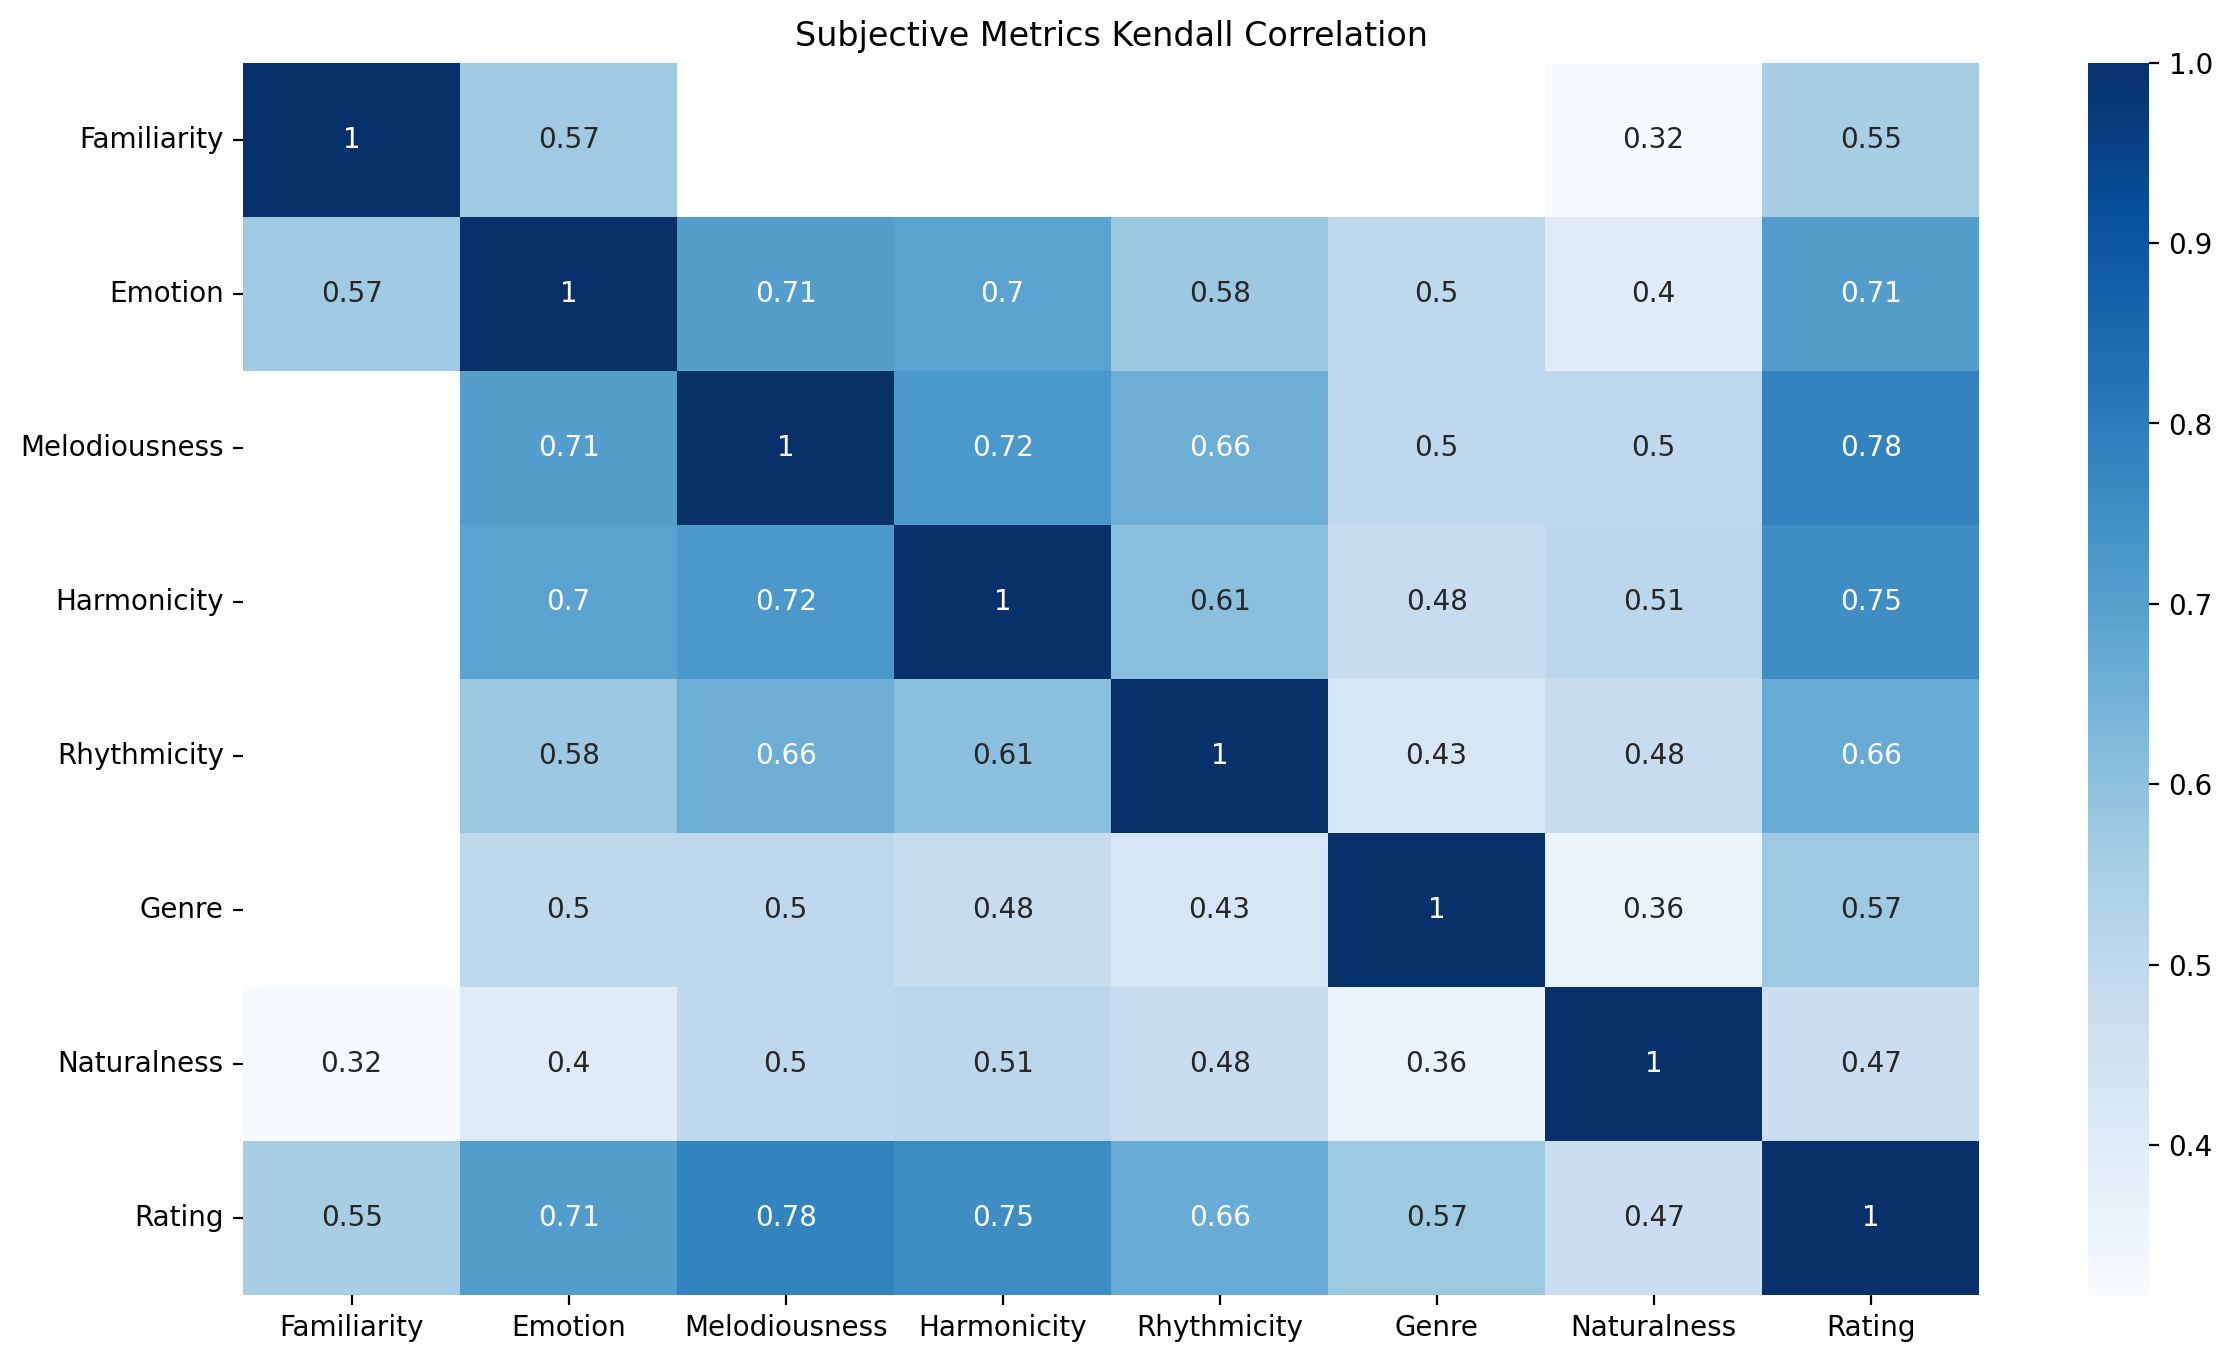

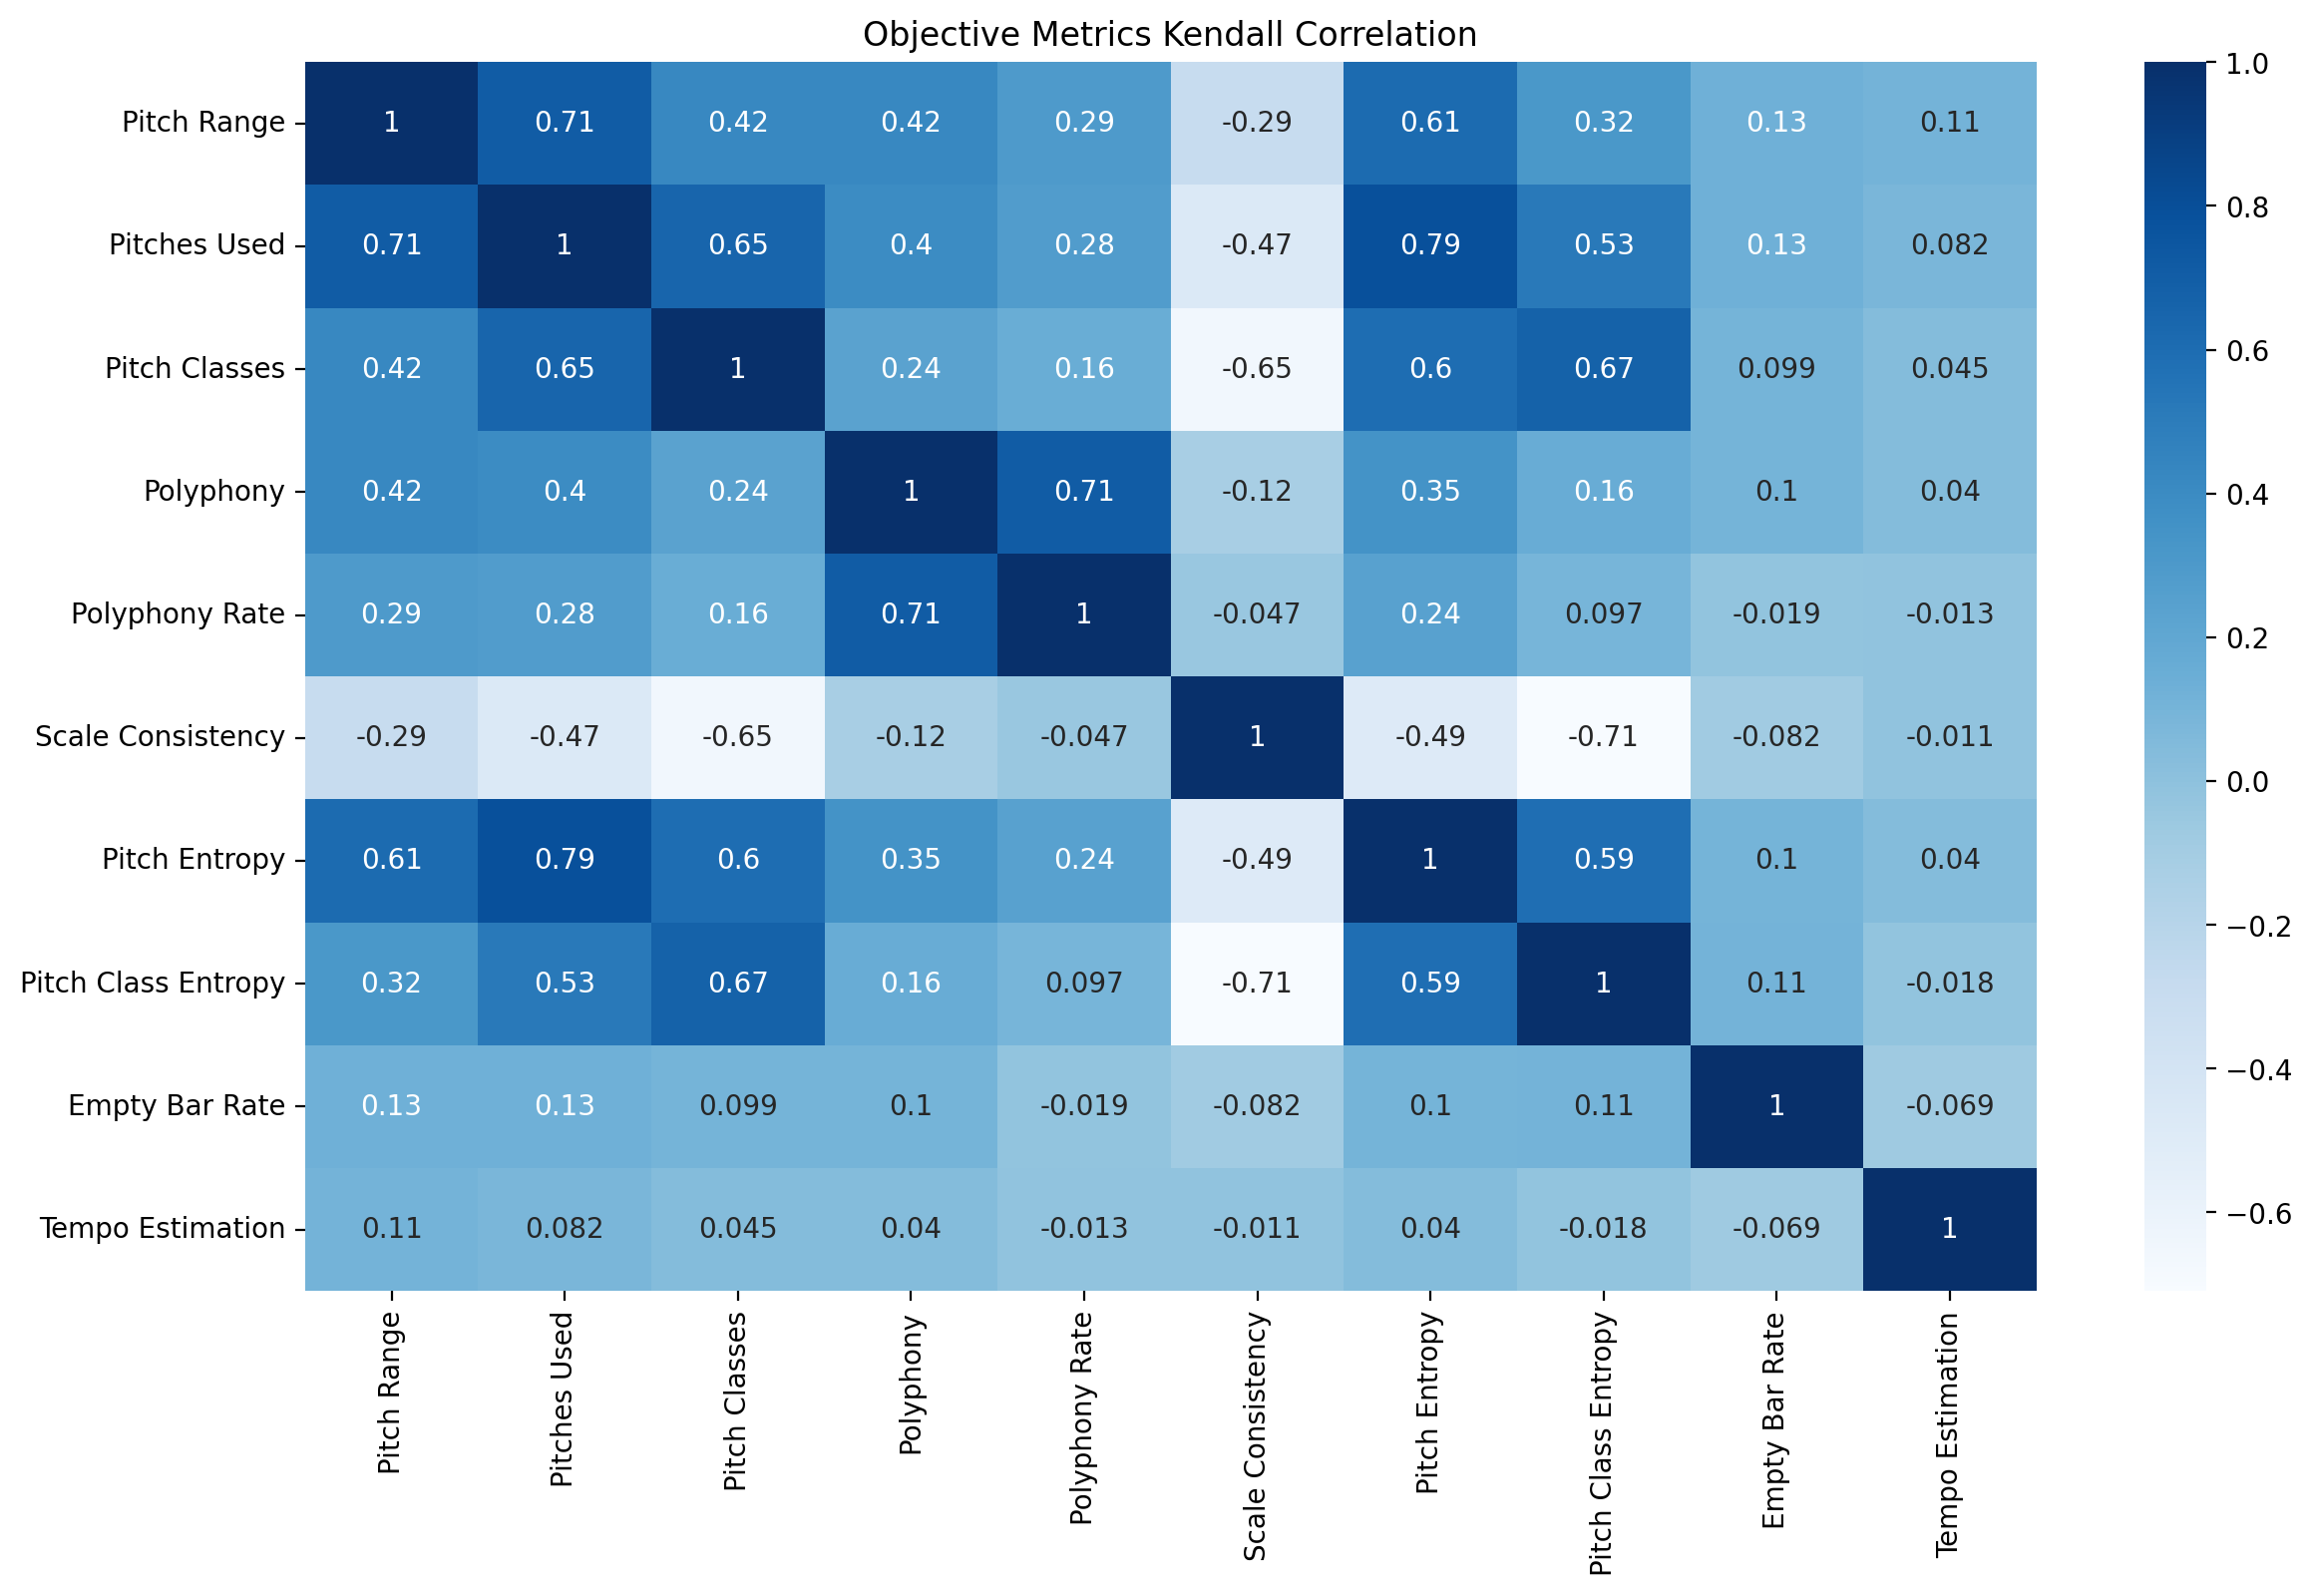

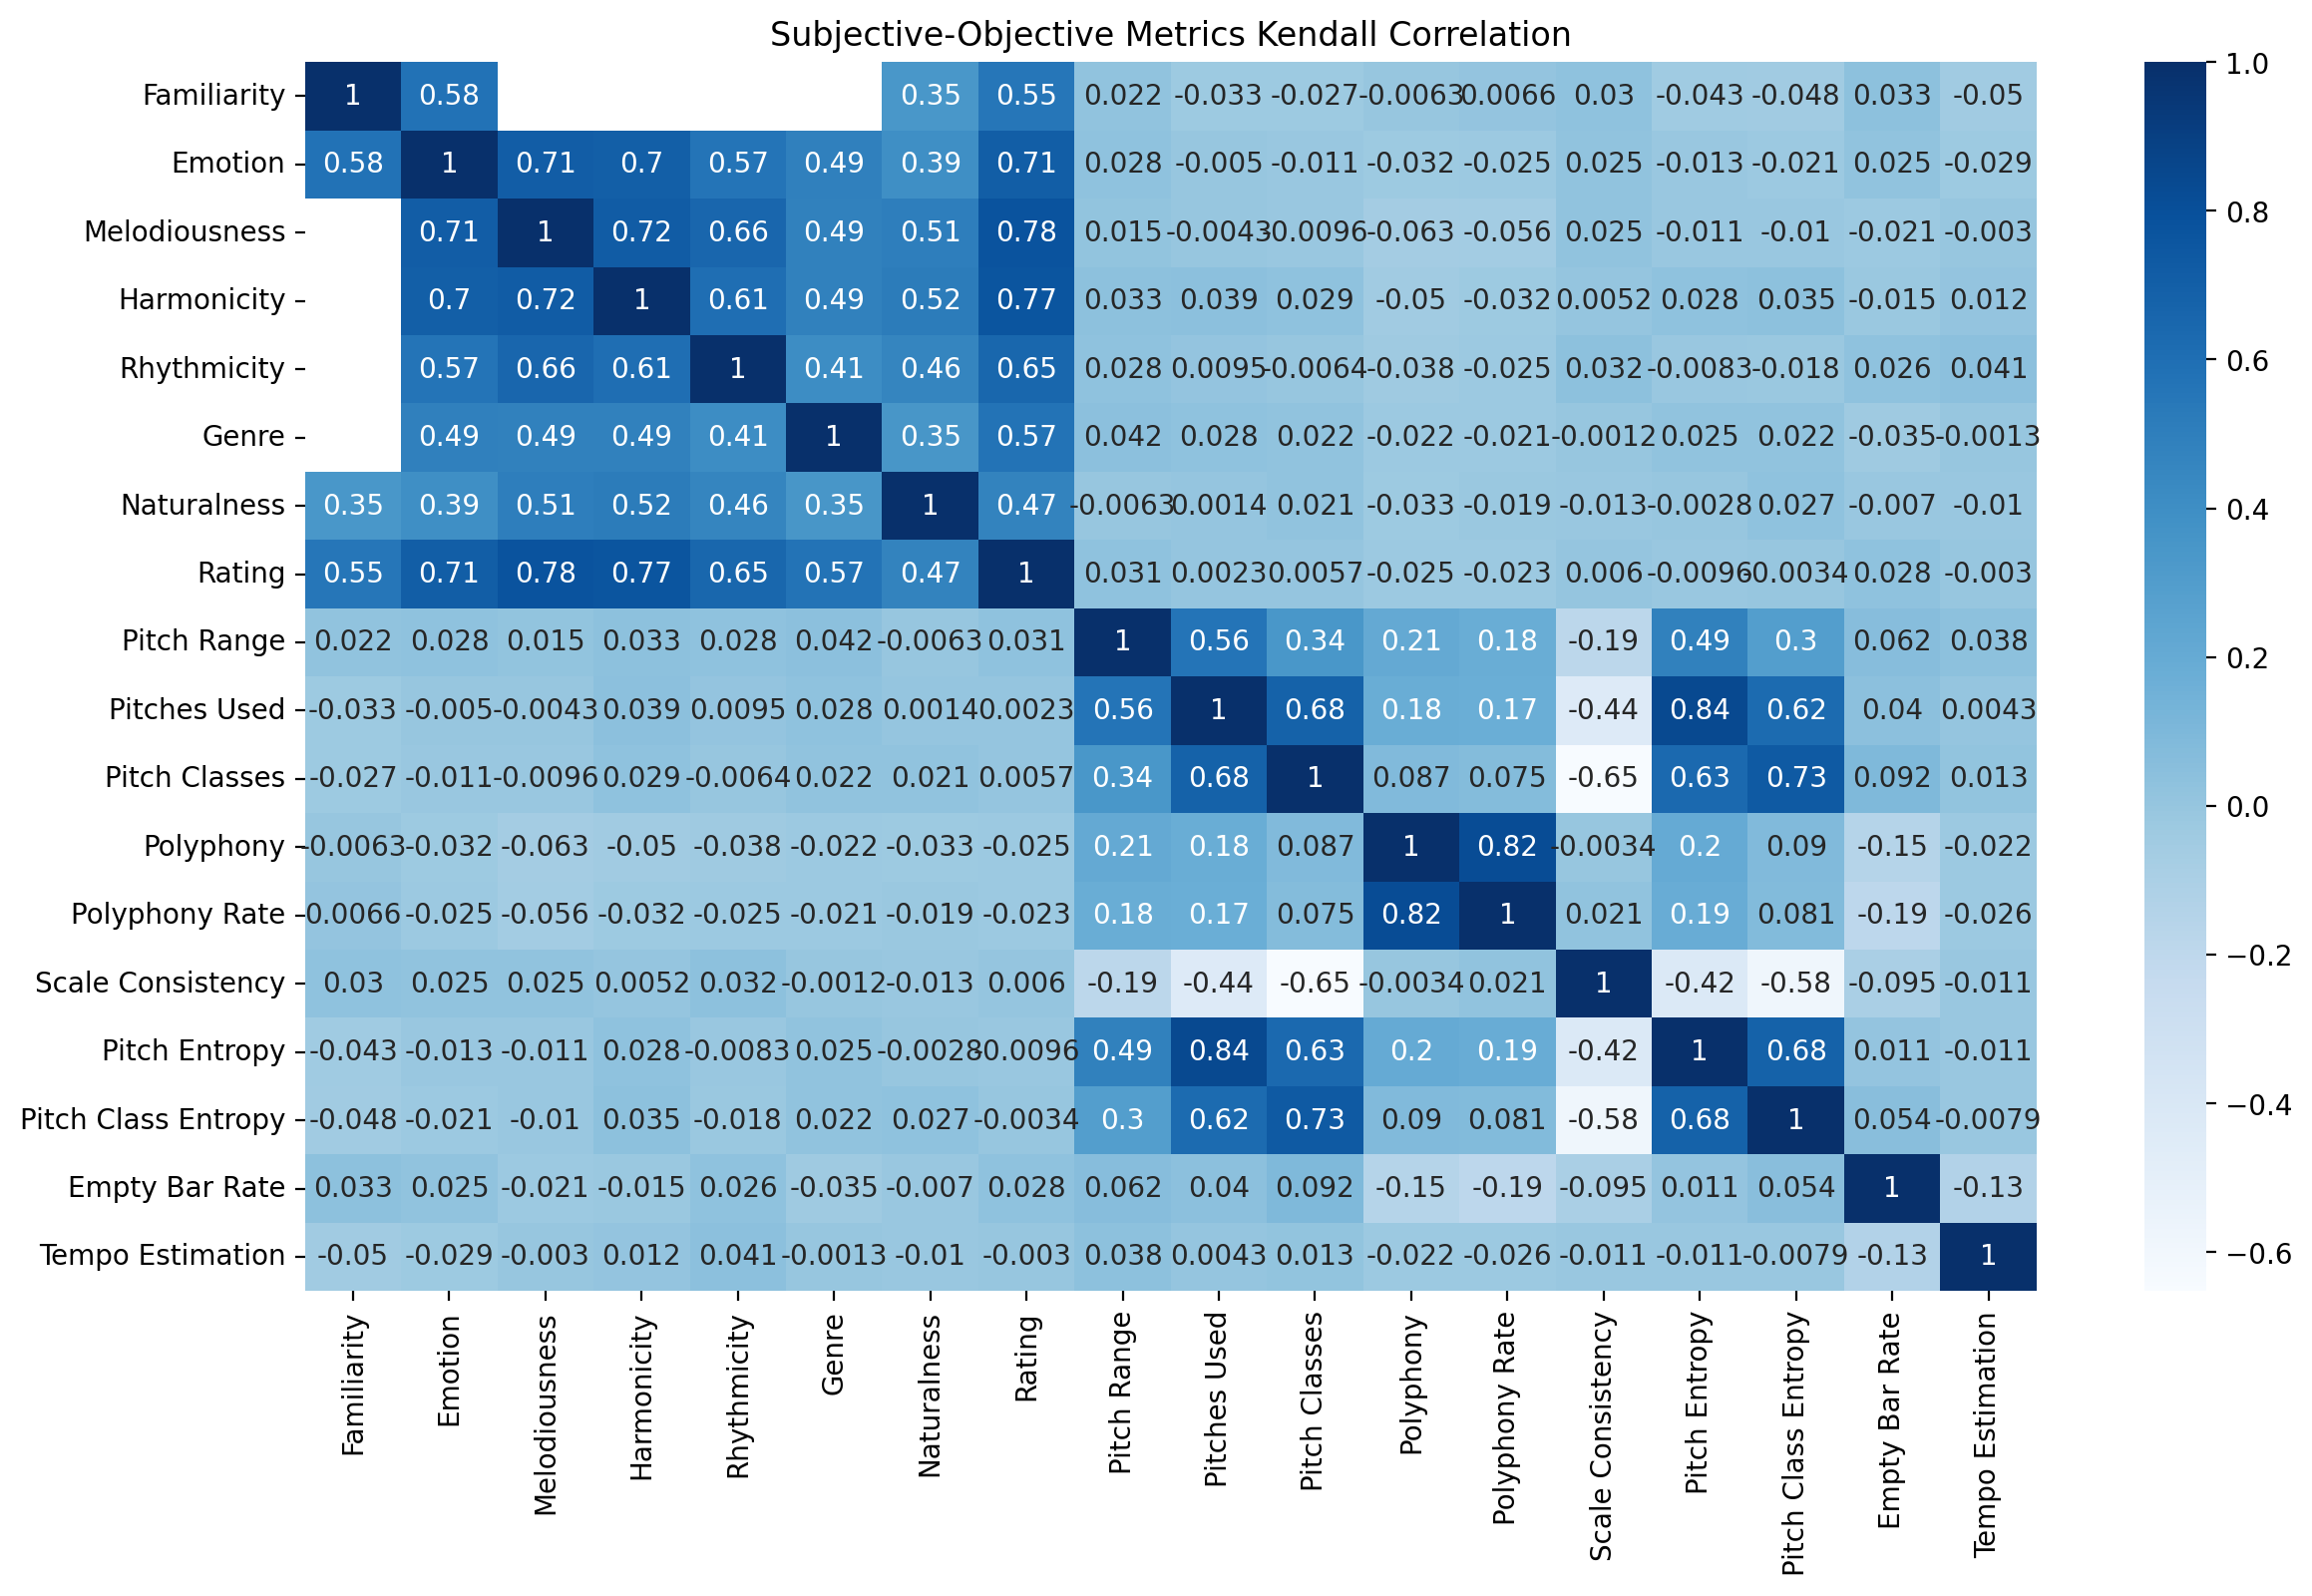

In [31]:
df_sub = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
df_sub_cor=df_sub.copy()
df_sub_cor.drop('Number', inplace=True, axis=1)
df_sub_cor=df_sub_cor.corr(method='kendall')

df_obj = pd.read_pickle('/data/data1/users/astais/Objective-Evaluation/metrics-files/dataframe.pkl')
df_obj_cor=df_obj.copy()
df_obj_cor.drop('Number', inplace=True, axis=1)
df_obj_cor=df_obj_cor.corr(method='kendall')

df_merged = pd.merge(df_sub, df_obj, on=['Dataset','Dataset Type','Number'])
df_merged.drop('Number', inplace=True, axis=1)
df_merged_cor = df_merged.corr(method='kendall')

plt.figure(figsize=(14,8))
g=sns.heatmap(df_sub_cor, annot=True, cmap='Blues')
g.set(title ="Subjective Metrics Kendall Correlation")
g.figure.savefig("sub-metrics-correlation.png",dpi=300,bbox_inches='tight')

plt.figure(figsize=(14,8))
g=sns.heatmap(df_obj_cor, annot=True, cmap='Blues')
g.set(title ="Objective Metrics Kendall Correlation")
g.figure.savefig("obj-metrics-correlation.png",dpi=300,bbox_inches='tight')

plt.figure(figsize=(14,8))
g=sns.heatmap(df_merged_cor, annot=True, cmap='Blues')
g.set(title ="Subjective-Objective Metrics Kendall Correlation")
g.figure.savefig("sub-obj-metrics-correlation.png",dpi=300,bbox_inches='tight')


writer = pd.ExcelWriter('correlations.xlsx', engine='xlsxwriter')
# write each dataframe to a different worksheet
df_sub_cor.to_excel(writer, sheet_name='Sub Metrics Correlations')
df_obj_cor.to_excel(writer, sheet_name='Obj Metrics Correlations')
df_merged_cor.to_excel(writer, sheet_name='Sub-Obj Metrics Correlations')

# save the Excel file
writer.save()

In [28]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(5), index=list('abcde'))
print(s)
# s['d'] = s['b'] # so there's a tie
print(s.rank())

a   -0.478042
b    0.425325
c    1.046962
d   -0.167769
e    0.724184
dtype: float64
a    1.0
b    3.0
c    5.0
d    2.0
e    4.0
dtype: float64


                                                                           Sample Name  \
0       music-transformer_GiantMIDI-Piano_Los-Angeles-MIDI-Dataset-segment_97_20230106   
1                               music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
2                               music-transformer_maestro-v3.0.0_ailabs1k7_71_20230104   
3                               music-transformer_adl-piano-midi_ailabs1k7_81_20230106   
4                               music-transformer_adl-piano-midi_ailabs1k7_81_20230106   
...                                                                                ...   
1375  perceiver-ar_Los-Angeles-MIDI-Dataset-segment_GiantMIDI-Piano_40_20221207_161342   
1376                     perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1377                     perceiver-ar_maestro-v3.0.0_adl-piano-midi_22_20221201_032308   
1378                             music-transformer_ailabs1k7_maestro-v3.0.0_4_20230106   
1379      

/tmp/ipykernel_2391174/1462440053.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pro.corr(method='kendall'), annot=True, cmap='Blues')


<AxesSubplot: >

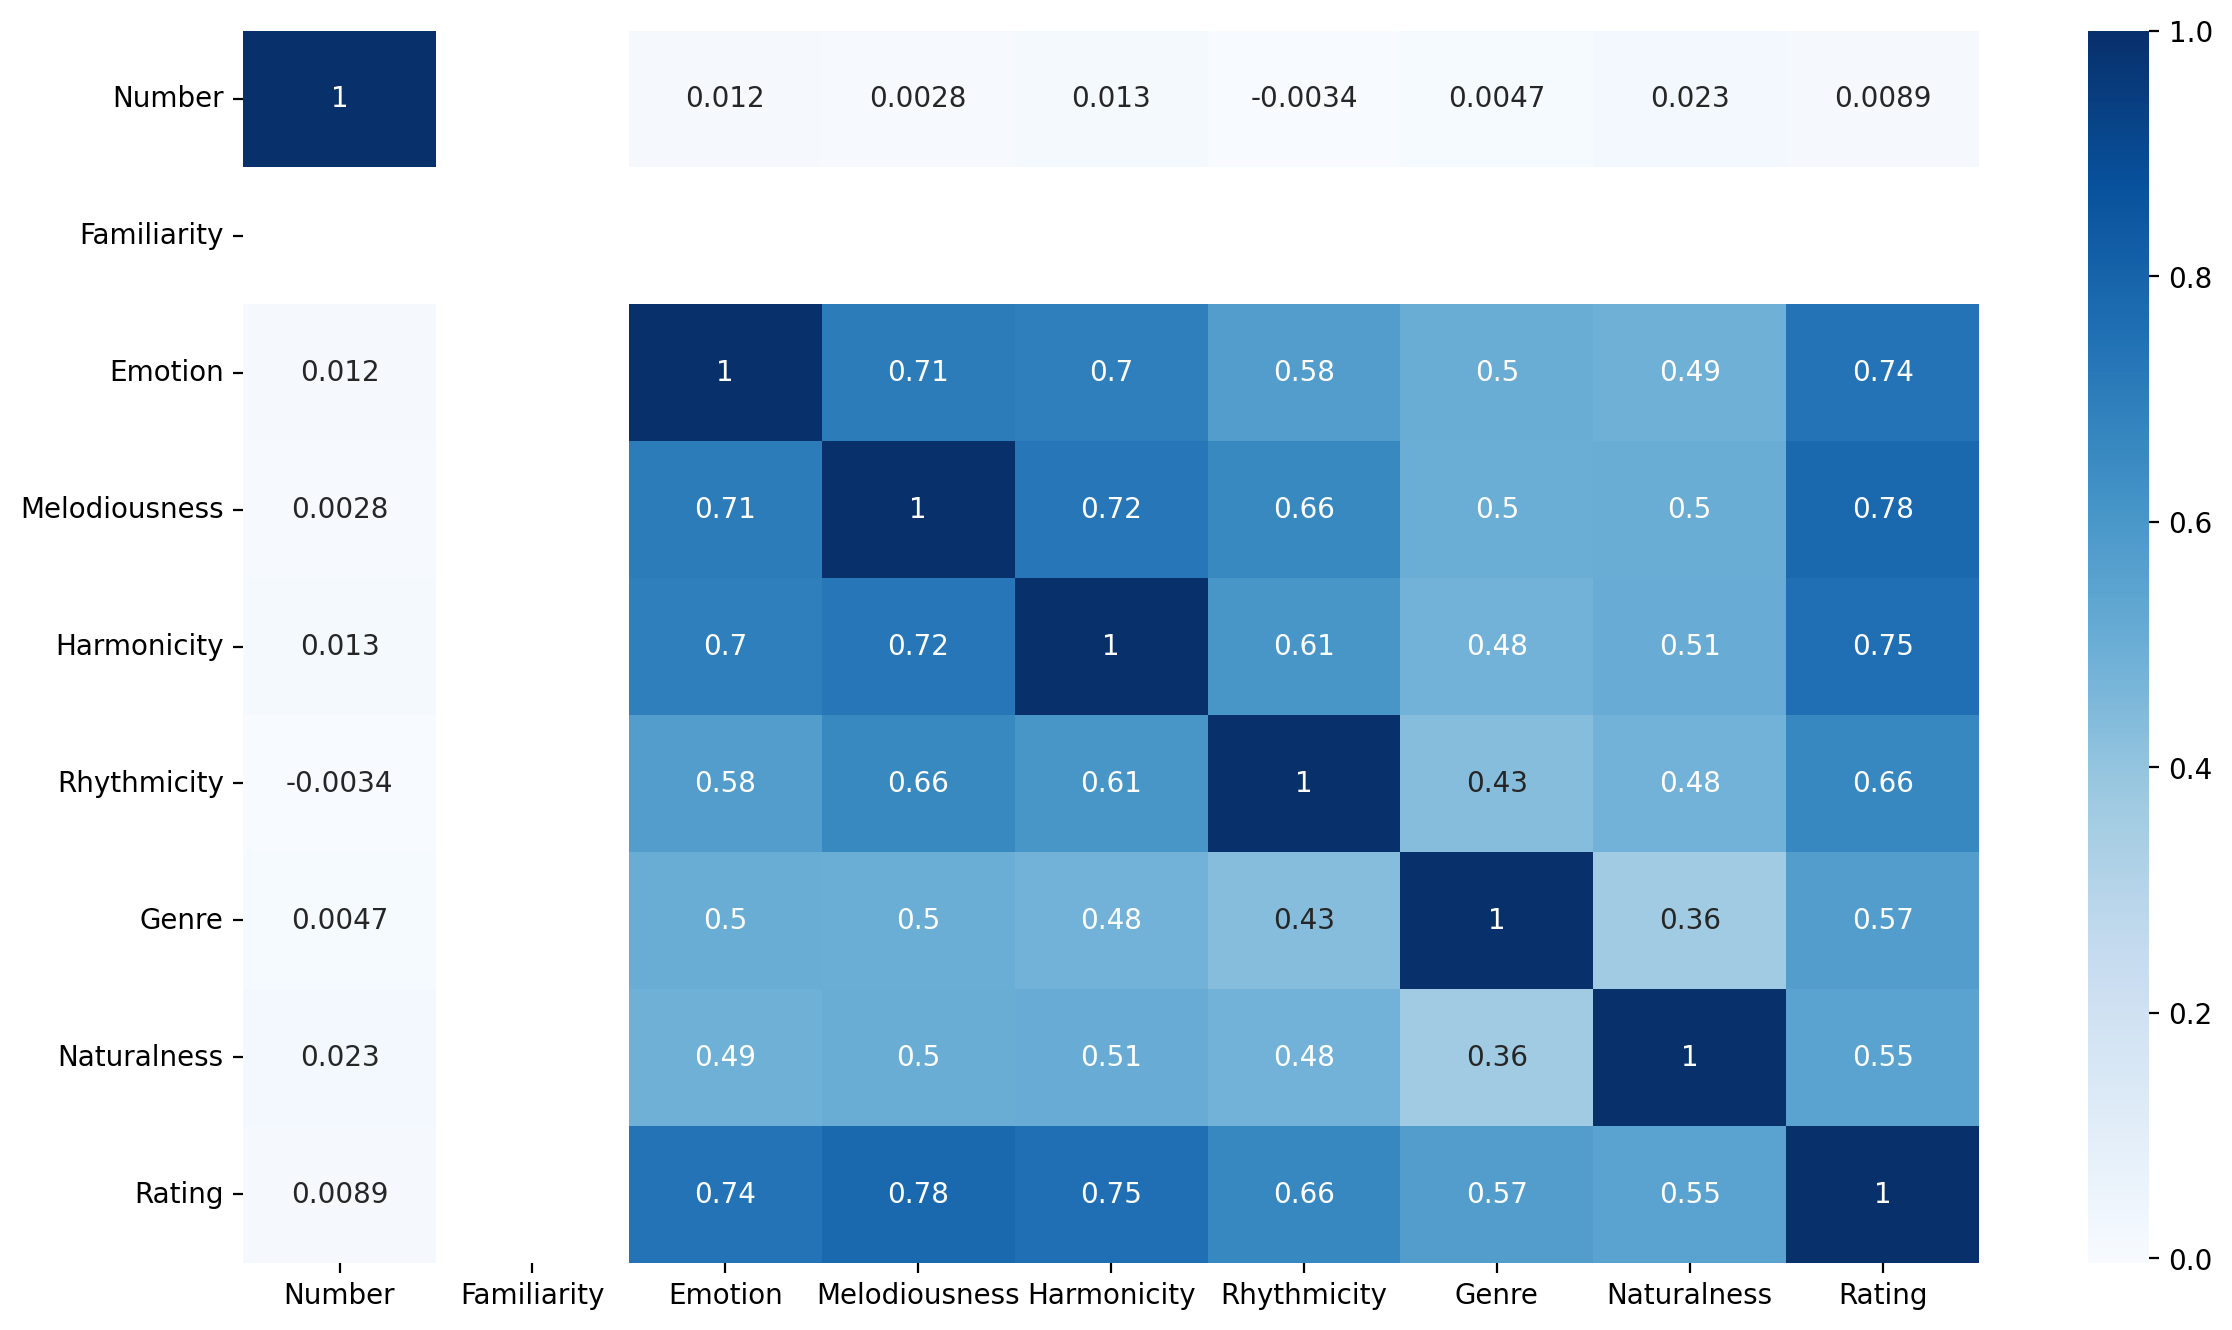

In [28]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')


df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
df_basic = df[df["Musical Knowledge"] == "Basic"].copy()

print(df)

plt.figure(figsize=(14,8))
sns.heatmap(df_pro.corr(method='kendall'), annot=True, cmap='Blues')

In [46]:
# set display options to show all rows
pd.set_option('display.max_rows', None)

#Best Musical Pieces
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
# df_pro = df[(df["Musical Knowledge"] == "Pro") & (df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Melodiousness"] == 5.0) & (df["Harmonicity"] == 5.0) & (df["Rhythmicity"] == 5.0) & (df["Emotion"] == 5.0) & (df["Naturalness"] == 1.0) & (df["Rating"] == 5.0)].copy()
# df_basic = df[(df["Musical Knowledge"] == "Basic") & (df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Naturalness"] == 1.0) & (df["Rating"] == 5.0)].copy()

df= df[~(df["Dataset Type"].astype(bool) & (df["Dataset Type"] == "Training Dataset"))]
df_sub = df[(df["Naturalness"] == 1.0) & (df["Rating"] == 5.0)].copy()
# drop duplicates of the 'song' column
df_sub = df_sub.drop_duplicates(subset='Sample Name')
print(df_sub)



                                                                                            Sample Name  \
155                        music-transformer_Los-Angeles-MIDI-Dataset-segment_adl-piano-midi_7_20230107   
165                          perceiver-ar_Los-Angeles-MIDI-Dataset-segment_ailabs1k7_31_20221207_190201   
183                                              music-transformer_ailabs1k7_adl-piano-midi_41_20230107   
209                                             music-transformer_GiantMIDI-Piano_ailabs1k7_25_20230105   
237                                         music-transformer_adl-piano-midi_adl-piano-midi_64_20230106   
239                                           perceiver-ar_ailabs1k17_adl-piano-midi_31_20221203_094420   
242                       music-transformer_maestro-v3.0.0_Los-Angeles-MIDI-Dataset-segment_93_20230105   
261                      perceiver-ar_Rock-Piano-MIDI-Dataset_Rock-Piano-MIDI-Dataset_8_20221205_004527   
299                               mus

In [52]:
df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
# Accuracy Χρηστών
df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
df_basic = df[df["Musical Knowledge"] == "Basic"].copy()
total_pro=len(df_pro)
total_basic=len(df_basic)

correct_pro=len(df_pro[(((df_pro["Dataset Type"] == "Perceiver-AR Outputs") | (df_pro["Dataset Type"] == "Music Transformer Outputs")) & 
                (df_pro["Naturalness"] == 0.0))])

correct_pro=correct_pro+len(df_pro[(((df_pro["Dataset Type"] == "Training Dataset")) & 
                (df_pro["Naturalness"] == 1.0))])

correct_basic=len(df_basic[(((df["Dataset Type"] == "Perceiver-AR Outputs") | (df_basic["Dataset Type"] == "Music Transformer Outputs")) & 
                (df_basic["Naturalness"] == 0.0))])

correct_basic=correct_basic+len(df_basic[(((df_basic["Dataset Type"] == "Training Dataset")) & 
                (df_basic["Naturalness"] == 1.0))])

print(correct_basic/len(df_basic))
print(correct_pro/len(df_pro))

0.5563798219584569
0.6260623229461756


/tmp/ipykernel_2391174/920206841.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_basic=len(df_basic[(((df["Dataset Type"] == "Perceiver-AR Outputs") | (df_basic["Dataset Type"] == "Music Transformer Outputs")) &


In [57]:
# df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
# # Apply transformation to 'Naturalness' column to scale to 1-5
# df['Naturalness'] = 4*df['Naturalness']+1
# df_pro = df[df["Musical Knowledge"] == "Pro"].copy()
# df_basic = df[df["Musical Knowledge"] == "Basic"].copy()
# # print(df_pro)
# # print(df_basic)

# # Create long (tidy) dataframe form
# df_basic.drop(["Sample Name","Dataset","Primer Dataset","Musical Knowledge",
#                "Melodiousness","Harmonicity","Rhythmicity","Genre"], inplace=True, axis=1)
# dfm_basic = df_basic.melt('Dataset Type', var_name='Subjective Metrics', value_name='Values').describe()

# df_pro.drop(["Sample Name","Dataset","Primer Dataset","Musical Knowledge","Familiarity"], inplace=True, axis=1)
# dfm_pro = df_pro.melt('Dataset Type', var_name='Subjective Metrics', value_name='Values').describe()

# print(dfm_basic)
# print(dfm_pro)


df = pd.read_pickle('/home/astais/ratings_dataframe.pkl')
d_n2={
    "adl-piano-midi": "adl-piano-midi" , 
    "ailabs1k7": "ailabs1k7",
    "ailabs1k17": "ailabs1k7",
    "GiantMIDI-Piano": "GiantMIDI-Piano",
    "Los-Angeles-MIDI-\nDataset-segment": "Los-Angeles-MIDI-Dataset-segment", 
    "maestro-v3.0.0": "maestro-v3.0.0",
     "Rock-Piano-\nMIDI-Dataset": "Rock-Piano-MIDI-Dataset"
}

excel_df_basic=pd.DataFrame()
excel_df_pro=pd.DataFrame()


df_sub = df[(df["Dataset Type"] == "Training Dataset") & (df["Musical Knowledge"] == "Basic")].describe()
df_sub2 = df[(df["Dataset Type"] == "Music Transformer Outputs") & (df["Musical Knowledge"] == "Basic")].describe()
df_sub3 = df[(df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Musical Knowledge"] == "Basic")].describe()
df_sub4 = df[(df["Dataset Type"] == "Training Dataset") & (df["Musical Knowledge"] == "Pro")].describe()
df_sub5 = df[(df["Dataset Type"] == "Music Transformer Outputs") & (df["Musical Knowledge"] == "Pro")].describe()
df_sub6 = df[(df["Dataset Type"] == "Perceiver-AR Outputs") & (df["Musical Knowledge"] == "Pro")].describe()

df_sub.insert(loc=0, column='Dataset Type', value=["Training Dataset"] *  len(df_sub))
df_sub2.insert(loc=0, column='Dataset Type', value=["Music Transformer Outputs"] *  len(df_sub2))
df_sub3.insert(loc=0, column='Dataset Type', value=["Perceiver-AR Outputs"] *  len(df_sub3))
df_sub4.insert(loc=0, column='Dataset Type', value=["Training Dataset"] *  len(df_sub4))
df_sub5.insert(loc=0, column='Dataset Type', value=["Music Transformer Outputs"] *  len(df_sub5))    
df_sub6.insert(loc=0, column='Dataset Type', value=["Perceiver-AR Outputs"] *  len(df_sub6))

df_sub.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
df_sub2.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
df_sub3.drop(["Melodiousness","Harmonicity", "Rhythmicity","Genre"], inplace=True, axis=1)
df_sub4.drop(["Familiarity"], inplace=True, axis=1)
df_sub5.drop(["Familiarity"], inplace=True, axis=1)
df_sub6.drop(["Familiarity"], inplace=True, axis=1)

df_sub.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)
df_sub2.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)
df_sub3.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)
df_sub4.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)
df_sub5.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)
df_sub6.drop(["count","min","25%", "50%","75%","max"], inplace=True, axis=0)

excel_df_basic=pd.concat([excel_df_basic,df_sub,df_sub2,df_sub3])
excel_df_pro=pd.concat([excel_df_pro,df_sub4,df_sub5,df_sub6])

print(excel_df_basic)
print(excel_df_pro)

                   Dataset Type        Number  Familiarity   Emotion  \
mean           Training Dataset  2.023011e+07     3.134021  2.896907   
std            Training Dataset  0.000000e+00     1.076538  1.122539   
mean  Music Transformer Outputs  5.297887e+01     3.063380  3.010563   
std   Music Transformer Outputs  2.944912e+01     1.144752  1.116798   
mean       Perceiver-AR Outputs  4.826280e+01     3.023891  3.064846   
std        Perceiver-AR Outputs  2.835651e+01     1.117778  1.075518   

      Naturalness    Rating  
mean     0.432990  2.896907  
std      0.498063  1.094347  
mean     0.433099  2.940141  
std      0.496379  1.086347  
mean     0.412969  2.897611  
std      0.493210  0.980858  
                   Dataset Type        Number   Emotion  Melodiousness  \
mean           Training Dataset  2.023011e+07  3.349057       3.066038   
std            Training Dataset  0.000000e+00  1.195567       1.259394   
mean  Music Transformer Outputs  5.114685e+01  3.237762       2